In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageDraw
import tensorflow as tf


In [2]:
file_path = '/root/code/ML_vs_Cancer/raw_data/train_labels.csv'
data = pd.read_csv(file_path)
data.head()


id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0

In [3]:
data.shape


(220025, 2)

In [4]:
data.describe()


label
count  220025.000000
mean        0.405031
std         0.490899
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000

In [5]:
# Check for duplicates
print('Number of duplicate rows:', data.duplicated().sum())

# Check for missing values
missing_values = data.isnull().sum()
print('Missing values in each column:\n', missing_values)


Number of duplicate rows: 0
Missing values in each column:
 id       0
label    0
dtype: int64


In [6]:
# Count of each label
label_counts = data['label'].value_counts()


label
0    130908
1     89117
Name: count, dtype: int64

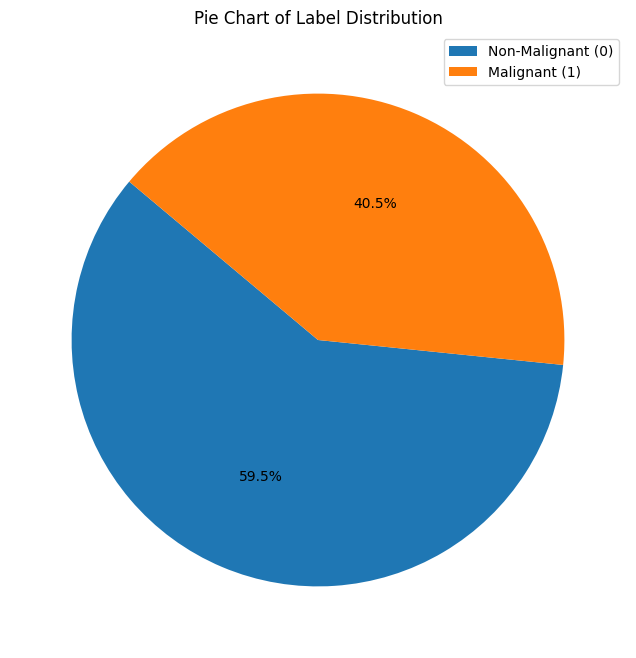

In [25]:
# Pie chart of label distribution with labels
labels = ['Non-Malignant (0)', 'Malignant (1)']
plt.figure(figsize=(8, 8))
plt.pie(label_counts, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Label Distribution')
plt.legend(labels)
plt.show()


In [8]:
labels_df = pd.DataFrame(data)


In [54]:
imgpath ='/root/code/ML_vs_Cancer/images'
malignant = labels_df.loc[labels_df['label']==1]['id'].values
non_malignant = labels_df.loc[labels_df['label']==0]['id'].values

print('non_malignant ids')
print(non_malignant[0:3],'\n')

print('malignant ids')
print(malignant[0:3])


non_malignant ids
['f38a6374c348f90b587e046aac6079959adf3835'
 '755db6279dae599ebb4d39a9123cce439965282d'
 'bc3f0c64fb968ff4a8bd33af6971ecae77c75e08'] 

malignant ids
['c18f2d887b7ae4f6742ee445113fa1aef383ed77'
 'a24ce148f6ffa7ef8eefb4efb12ebffe8dd700da'
 '7f6ccae485af121e0b6ee733022e226ee6b0c65f']


In [41]:
# check that the images path works
os.path.exists(imgpath)


True

In [32]:
def plot_fig(ids, title, nrows=5, ncols=15):
    """
    Plots a grid of images.
    """
    fig, ax = plt.subplots(nrows, ncols, figsize=(18, 6))
    plt.subplots_adjust(wspace=0, hspace=0)

    for i, j in enumerate(ids[:nrows * ncols]):
        fname = os.path.join(imgpath, j + '.tif')
        img = Image.open(fname)
        idcol = ImageDraw.Draw(img)
        idcol.rectangle(((0, 0), (95, 95)), outline='white')

        plt.subplot(nrows, ncols, i + 1)
        plt.imshow(np.array(img))
        plt.axis('off')

    plt.suptitle(title, y=0.94, fontsize=14)
    plt.show()


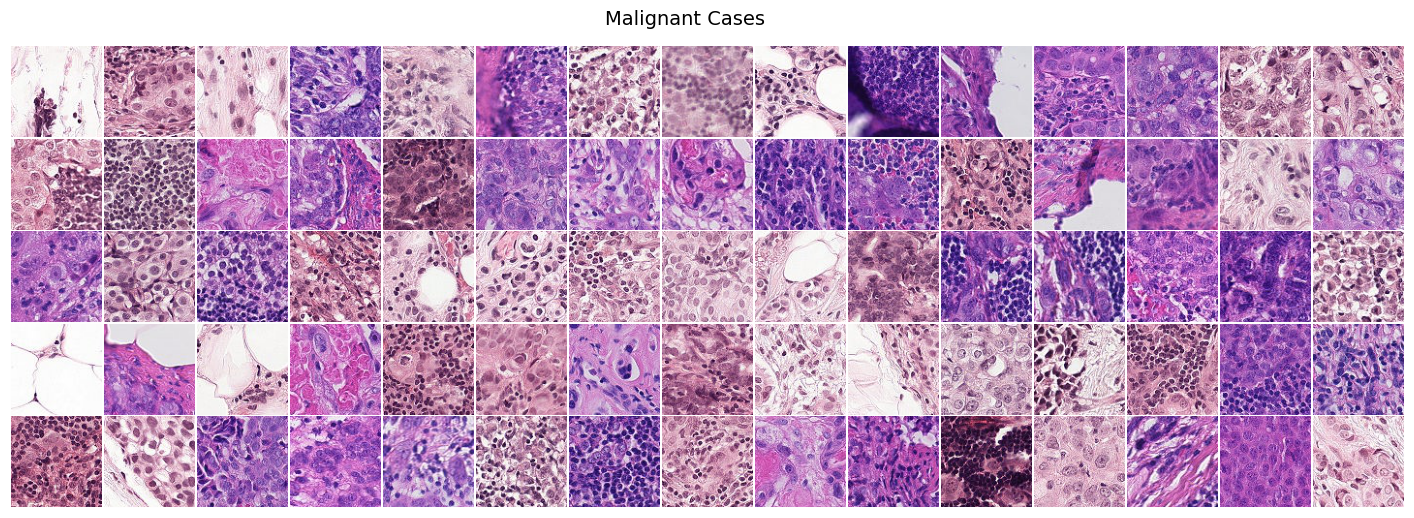

In [33]:
plot_fig(malignant,'Malignant Cases')


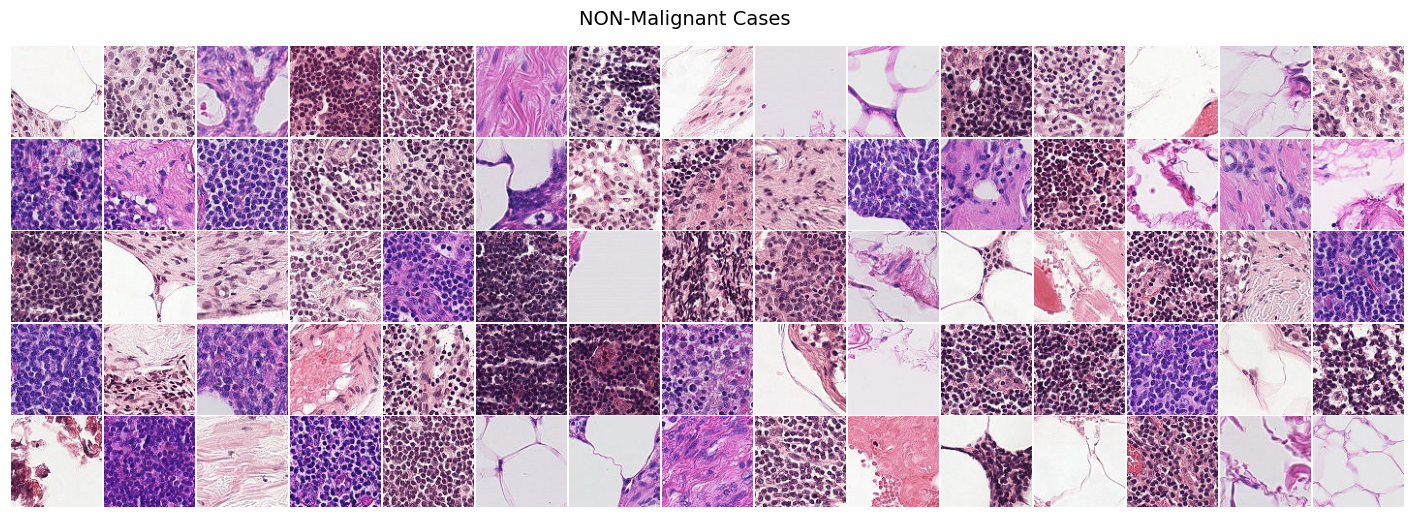

In [34]:
plot_fig(non_malignant,'NON-Malignant Cases')


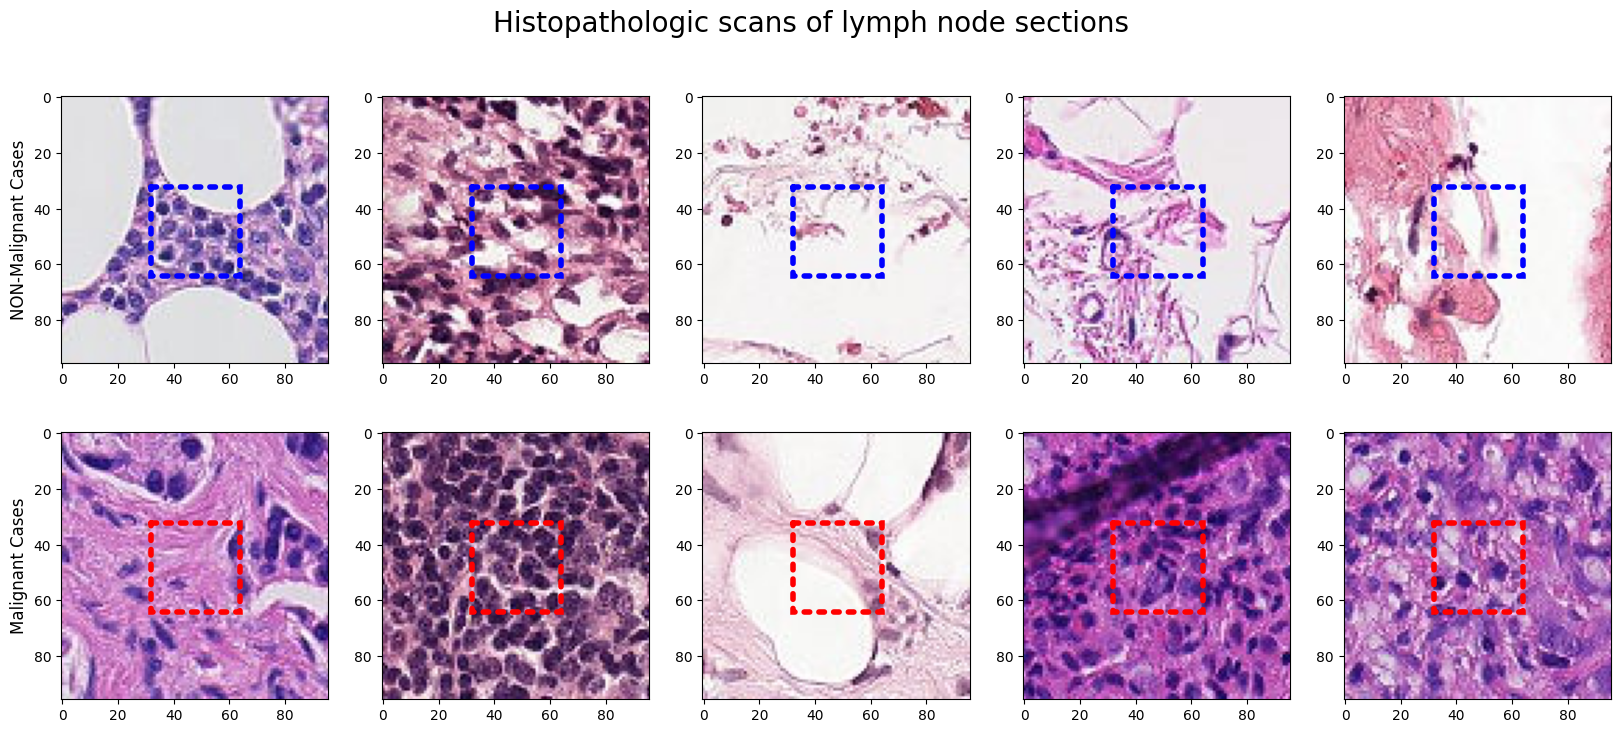

In [56]:
def plot_image_with_box(ax, idx, edgecolor, imgpath):
    path = os.path.join(imgpath, idx + '.tif')
    # Read and display the image
    img = Image.open(path)
    ax.imshow(img)
    # Draw a rectangle
    ax.add_patch(plt.Rectangle((32, 32), 32, 32, fill=False, edgecolor=edgecolor, linewidth=4, linestyle=':', capstyle='round'))

# Shuffle the data
shuffled_data = data.sample(frac=1).reset_index(drop=True)

fig, ax = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle('Histopathologic scans of lymph node sections', fontsize=20)

# Plot images
for row, label in enumerate([0, 1]):
    for i, idx in enumerate(shuffled_data[shuffled_data['label'] == label]['id'][:5]):
        color = 'b' if label == 0 else 'r'
        plot_image_with_box(ax[row, i], idx, color, imgpath)
    ylabel = 'NON-Malignant Cases' if label == 0 else 'Malignant Cases'
    ax[row, 0].set_ylabel(ylabel, size='large')

plt.show()


In [36]:
# def create_sample_image(size, color):
#     """
#     Create a simple image of a specified size and color.
#     """
#     image = Image.new('RGB', size, color)
#     draw = ImageDraw.Draw(image)
#     draw.rectangle([(0, 0), size], outline="black", width=2)
#     return image

# # Create 5 sample images of different sizes
# sample_images = [
#     create_sample_image((100, 100), "red"),
#     create_sample_image((150, 150), "green"),
#     create_sample_image((200, 200), "blue"),
#     create_sample_image((250, 250), "yellow"),
#     create_sample_image((300, 300), "purple")
# ]

# sample_images[4].show()


In [57]:
# # Data Augmentation 32x32px (we can do 48x48px upon results)
# def crop_image_tensorflow(img_path, target_size):
#     img = tf.io.read_file(img_path)
#     img = tf.image.decode_image(img, channels=3)

#     # Perform the cropping operation
#     img_cropped = tf.image.resize_with_crop_or_pad(img, target_size[0], target_size[1])
#     return img_cropped

# # img_path = 'path_to_your_image.jpg'  # replace with your image path
# target_size = (32, 32)  # desired output size(try 48x48px)
# cropped_img = crop_image_tensorflow(sample_images, target_size)
